# Image Classification Using CNN with the CIFAR-10 Dataset

In [1]:
# Step 1: Importing the necessary libraries.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
#from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
# Step 2: Loading and pre-processing of the CIFAR-10 dataset.

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
# Step 3: Normalising pixel values to be between 0 and 1.
# Original Range: Each pixel value is originally an integer between 0 and 255.
# Normalized Range: After division, each pixel value is a float between 0 and 1.

train_images = train_images/255.0
test_images = test_images/255.0

In [4]:
# Step 4: Defining the class names for CIFAR-10 images.

class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

cmap=plt.cm.binary argument sets the color map to binary, displaying the image in black and white.

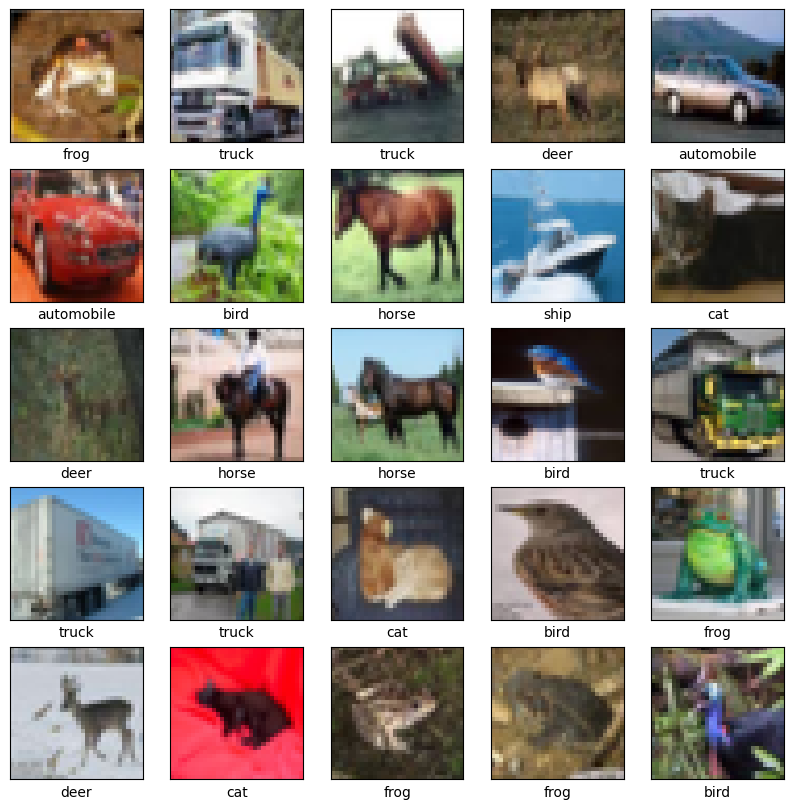

In [5]:
# Step 5: Visulaising a few training images from the CIFAR-10 dataset.

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([]) #These lines remove the x-axis and y-axis tick marks from the subplot for a cleaner appearance.
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_name[train_labels[i][0]])

plt.show()

### Conv2D = This is a 2D convolutional layer with 32 filters, each of size 3x3.

activation='relu' means the ReLU (Rectified Linear Unit) activation function is applied.

input_shape=(32,32,3) specifies the input shape of the images (32x32 pixels with 3 color channels - RGB).


### MaxPooling2D =This layer reduces the spatial dimensions (height and width) of the input by taking the maximum value over a 2x2 window.

### Flatten: This layer flattens the 3D output of the convolutional layers into a 1D vector.


### Dense (64) = This is a fully connected (dense) layer with 64 units and ReLU activation. Last one is for output 10 is for 10 classes of classification.

In [6]:
# Step 6: Building the CNN model (customised model).

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Step 7: Printing the model summary.
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

SparseCategoricalCrossentropy= Suitable for Multi-Class Classification
Cross-Entropy Calculation:

The function calculates the **cross-entropy loss** between the true labels and the predicted outputs. **Cross-entropy loss is a measure of the difference between two probability distributions**—in this case, **the true labels and the predicted probabilities from the model**. It’s a common loss function for classification tasks because it quantifies the performance of a classification model whose output is a probability value between 0 and 1.

In [8]:
# Step 8: Compiling the CNN model.
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )


In [9]:
# Step 9: Training the CNN model.
trained_model = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3611 - loss: 1.7276 - val_accuracy: 0.5337 - val_loss: 1.3018
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.5771 - loss: 1.1824 - val_accuracy: 0.6213 - val_loss: 1.0701
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6490 - loss: 0.9989 - val_accuracy: 0.6567 - val_loss: 0.9797
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6824 - loss: 0.9034 - val_accuracy: 0.6625 - val_loss: 0.9888
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7082 - loss: 0.8315 - val_accuracy: 0.6855 - val_loss: 0.9033
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7331 - loss: 0.7634 - val_accuracy: 0.7041 - val_loss: 0.8542
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7503 - loss: 0.7090 - val_accuracy: 0.7186 - val_loss: 0.8389
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7664 - loss: 0.6649

In [10]:
# Step 10: Evaluating the performance of the CNN model.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(f'\n Test accuracy is: {test_acc}')

313/313 - 0s - 2ms/step - accuracy: 0.7219 - loss: 0.8402

 Test accuracy is: 0.7218999862670898


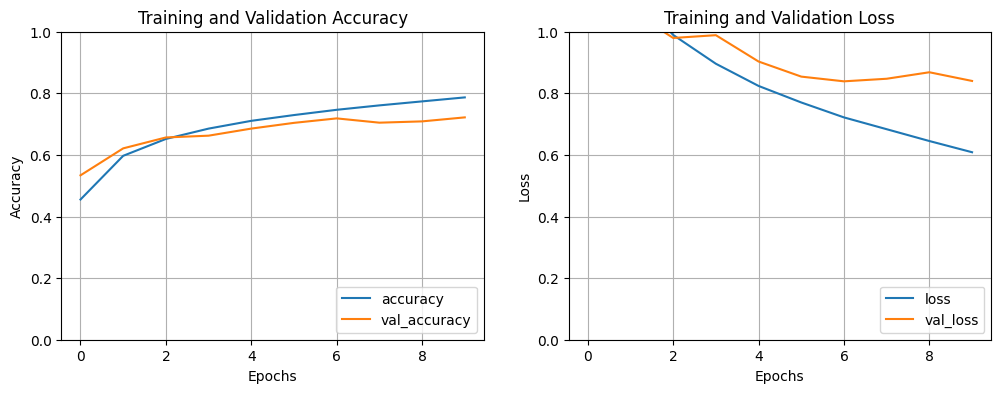

In [11]:
# Step 11: Plotting the training and validation accuracy and loss values.
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(trained_model.history['accuracy'], label='accuracy')
plt.plot(trained_model.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(trained_model.history['loss'], label='loss')
plt.plot(trained_model.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()